##Import Libraries and Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import tensorflow as tf

In [ ]:
with open("/content/train.p",mode='rb') as training_data:
    train=pickle.load(training_data)

In [ ]:
with open("/content/valid.p",mode='rb') as validation_data:
    valid=pickle.load(validation_data)

In [ ]:
with open("/content/test.p",mode='rb') as testing_data:
    test=pickle.load(testing_data)

In [ ]:
X_train,y_train = train['features'],train['labels']
X_validation, y_validation = valid['features'],valid['labels']
X_test,y_test = test['features'],test['labels']

In [ ]:
X_train.shape

(34799, 32, 32, 3)

In [ ]:
y_train.shape

(34799,)

In [ ]:
X_validation.shape

(4410, 32, 32, 3)

In [ ]:
y_validation.shape

(4410,)

In [ ]:
X_test.shape

(12630, 32, 32, 3)

In [ ]:
y_test.shape

(12630,)

##Image Exploration

37

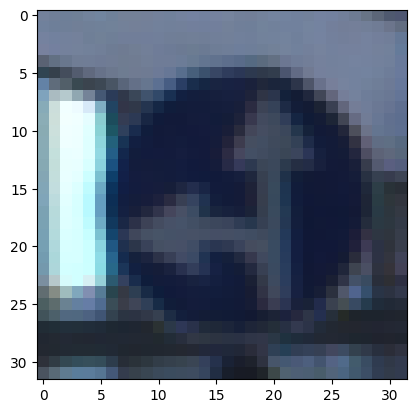

In [ ]:
i = 5000
plt.imshow(X_train[i])
y_train[i]

17

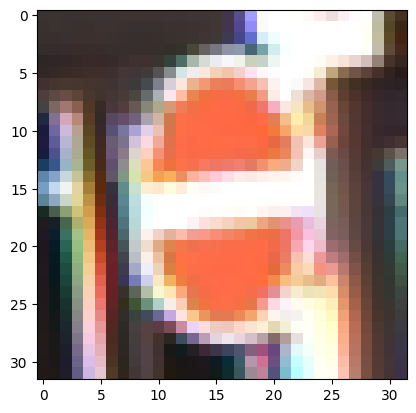

In [ ]:
i = 4000
plt.imshow(X_validation[i])
y_validation[i]

34

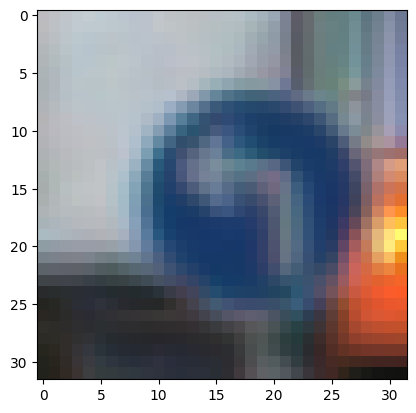

In [ ]:
i = 2000
plt.imshow(X_test[i])
y_test[i]

##Data Preparation

In [ ]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [ ]:
X_train_gray = np.sum(X_train/3, axis = 3, keepdims = True)
X_test_gray = np.sum(X_test/3, axis = 3, keepdims = True)
X_validation_gray  = np.sum(X_validation/3, axis = 3, keepdims = True)

In [ ]:
X_train_gray.shape

(34799, 32, 32, 1)

In [ ]:
X_test_gray.shape

(12630, 32, 32, 1)

In [ ]:
X_validation_gray.shape

(4410, 32, 32, 1)

In [ ]:
X_train_gray_norm = (X_train_gray-128)/128
X_test_gray_norm = (X_test_gray-128)/128
X_validation_gray_norm = (X_validation_gray-128)/128

In [ ]:
X_train_gray_norm

array([[[[-0.74479167],
         [-0.73697917],
         [-0.73177083],
         ...,
         [-0.765625  ],
         [-0.76822917],
         [-0.75260417]],

        [[-0.69270833],
         [-0.72395833],
         [-0.71875   ],
         ...,
         [-0.72916667],
         [-0.74479167],
         [-0.76041667]],

        [[-0.71614583],
         [-0.72916667],
         [-0.72135417],
         ...,
         [-0.74479167],
         [-0.7578125 ],
         [-0.765625  ]],

        ...,

        [[-0.7578125 ],
         [-0.7578125 ],
         [-0.76822917],
         ...,
         [-0.73958333],
         [-0.79166667],
         [-0.7890625 ]],

        [[-0.73958333],
         [-0.77604167],
         [-0.78125   ],
         ...,
         [-0.72916667],
         [-0.77864583],
         [-0.79166667]],

        [[-0.7578125 ],
         [-0.7890625 ],
         [-0.78125   ],
         ...,
         [-0.73697917],
         [-0.76822917],
         [-0.76041667]]],


       [[[-0.80989583],


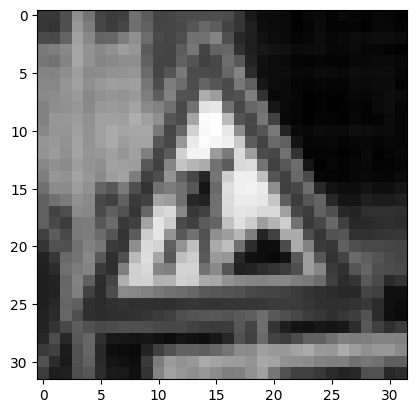

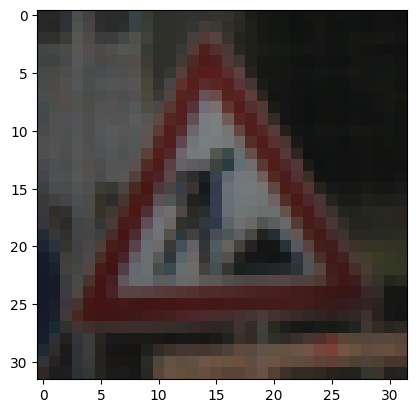

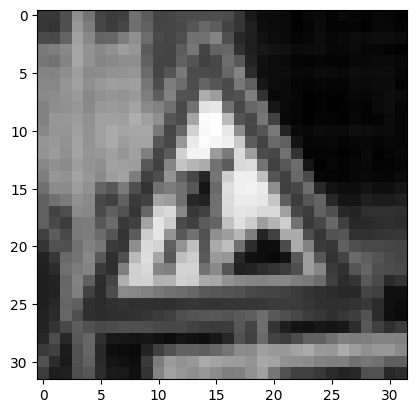

In [ ]:
i = 900
plt.imshow(X_train_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray')

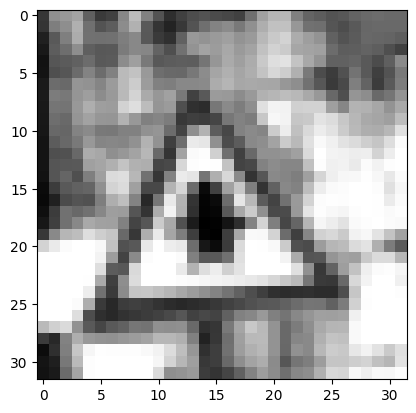

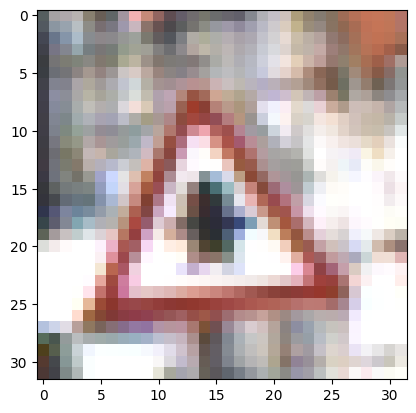

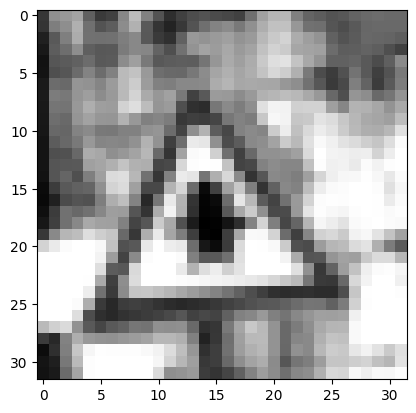

In [ ]:
i = 900
plt.imshow(X_test_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_test[i])
plt.figure()
plt.imshow(X_test_gray_norm[i].squeeze(), cmap = 'gray')

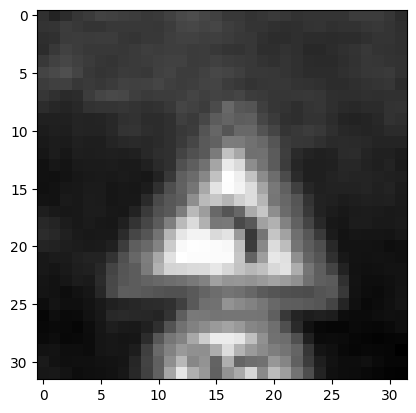

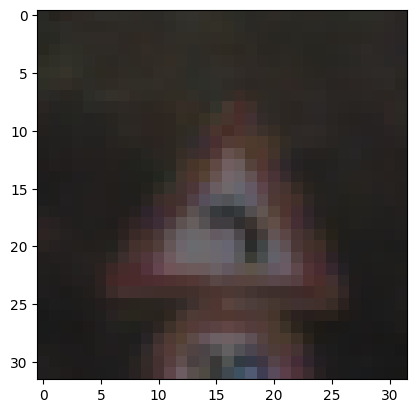

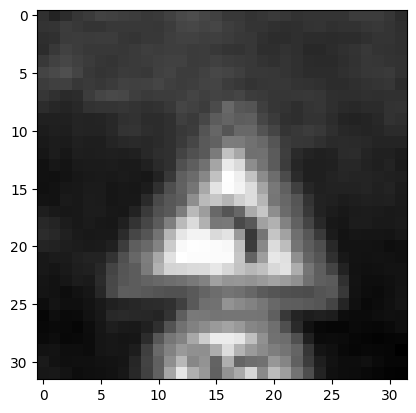

In [ ]:
i = 900
plt.imshow(X_validation_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_validation[i])
plt.figure()
plt.imshow(X_validation_gray_norm[i].squeeze(), cmap = 'gray')

Building CNN Model

In [ ]:
from tensorflow.keras import datasets,layers,models

CNN=models.Sequential()
CNN.add(layers.Conv2D(6,(5,5), activation = 'relu',input_shape=(32,32,1)))
CNN.add(layers.AveragePooling2D())

CNN.add(layers.Conv2D(16,(5,5), activation = 'relu'))
CNN.add(layers.AveragePooling2D())

CNN.add(layers.Flatten())

CNN.add(layers.Dense(120, activation = 'relu'))
CNN.add(layers.Dense(84, activation = 'relu'))
CNN.add(layers.Dense(43, activation = 'softmax'))
CNN.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_4 (Avera  (None, 14, 14, 6)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_5 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_5 (Avera  (None, 5, 5, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten_2 (Flatten)         (None, 400)               0         
                                                                 
 dense_6 (Dense)             (None, 120)              

##Training CNN Model

In [ ]:
CNN.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = CNN.fit(X_train_gray_norm,
                  y_train,
                  batch_size=500,
                  epochs=50,
                  verbose=1,
                  validation_data=(X_validation_gray_norm,y_validation))



Epoch 1/50
70/70 [==============================] - 16s 208ms/step - loss: 3.1989 - accuracy: 0.1711 - val_loss: 2.6546 - val_accuracy: 0.3234
Epoch 2/50
70/70 [==============================] - 14s 203ms/step - loss: 1.6777 - accuracy: 0.5301 - val_loss: 1.4535 - val_accuracy: 0.5746
Epoch 3/50
70/70 [==============================] - 14s 203ms/step - loss: 0.9471 - accuracy: 0.7301 - val_loss: 1.0396 - val_accuracy: 0.6744
Epoch 4/50
70/70 [==============================] - 14s 203ms/step - loss: 0.6835 - accuracy: 0.8052 - val_loss: 0.8545 - val_accuracy: 0.7399
Epoch 5/50
70/70 [==============================] - 14s 204ms/step - loss: 0.5507 - accuracy: 0.8449 - val_loss: 0.7592 - val_accuracy: 0.7744
Epoch 6/50
70/70 [==============================] - 14s 204ms/step - loss: 0.4476 - accuracy: 0.8770 - val_loss: 0.7253 - val_accuracy: 0.7832
Epoch 7/50
70/70 [==============================] - 15s 213ms/step - loss: 0.3842 - accuracy: 0.8970 - val_loss: 0.7226 - val_accuracy: 0.7841

##Performance of CNN model

In [ ]:
score = CNN.evaluate(X_test_gray_norm,y_test)
print('Test Accuracy; {}'.format(score[1]))

395/395 [==============================] - 3s 7ms/step - loss: 1.3479 - accuracy: 0.8574
Test Accuracy; 0.8574029803276062


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
accuracy = history.history['accuracy']
val_accuaracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'training and validation loss')

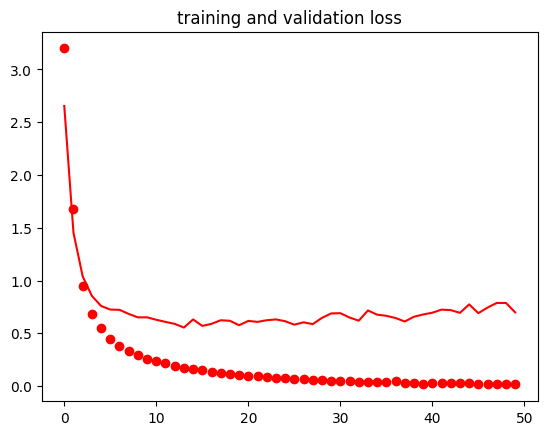

In [ ]:
epochs = range(len(accuracy))
plt.plot(epochs,loss,'ro',label = 'training loss')
plt.plot(epochs,val_loss,'r',label = 'validation loss')
plt.title('training and validation loss')

Text(0.5, 1.0, 'training and validation accuracy')

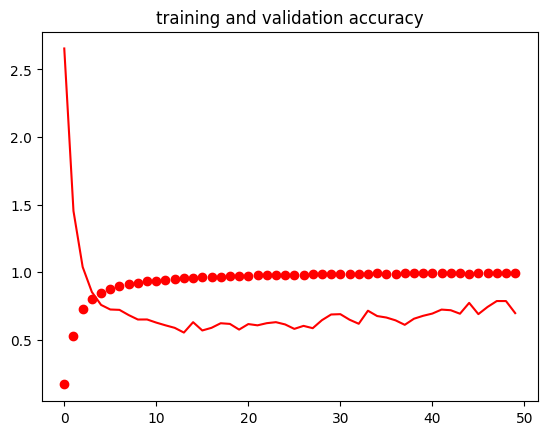

In [ ]:
epochs = range(len(accuracy))
plt.plot(epochs,accuracy,'ro',label = 'training accuracy')
plt.plot(epochs,val_loss,'r',label = 'validation accuracy')
plt.title('training and validation accuracy')

395/395 [==============================] - 3s 7ms/step


<Axes: >

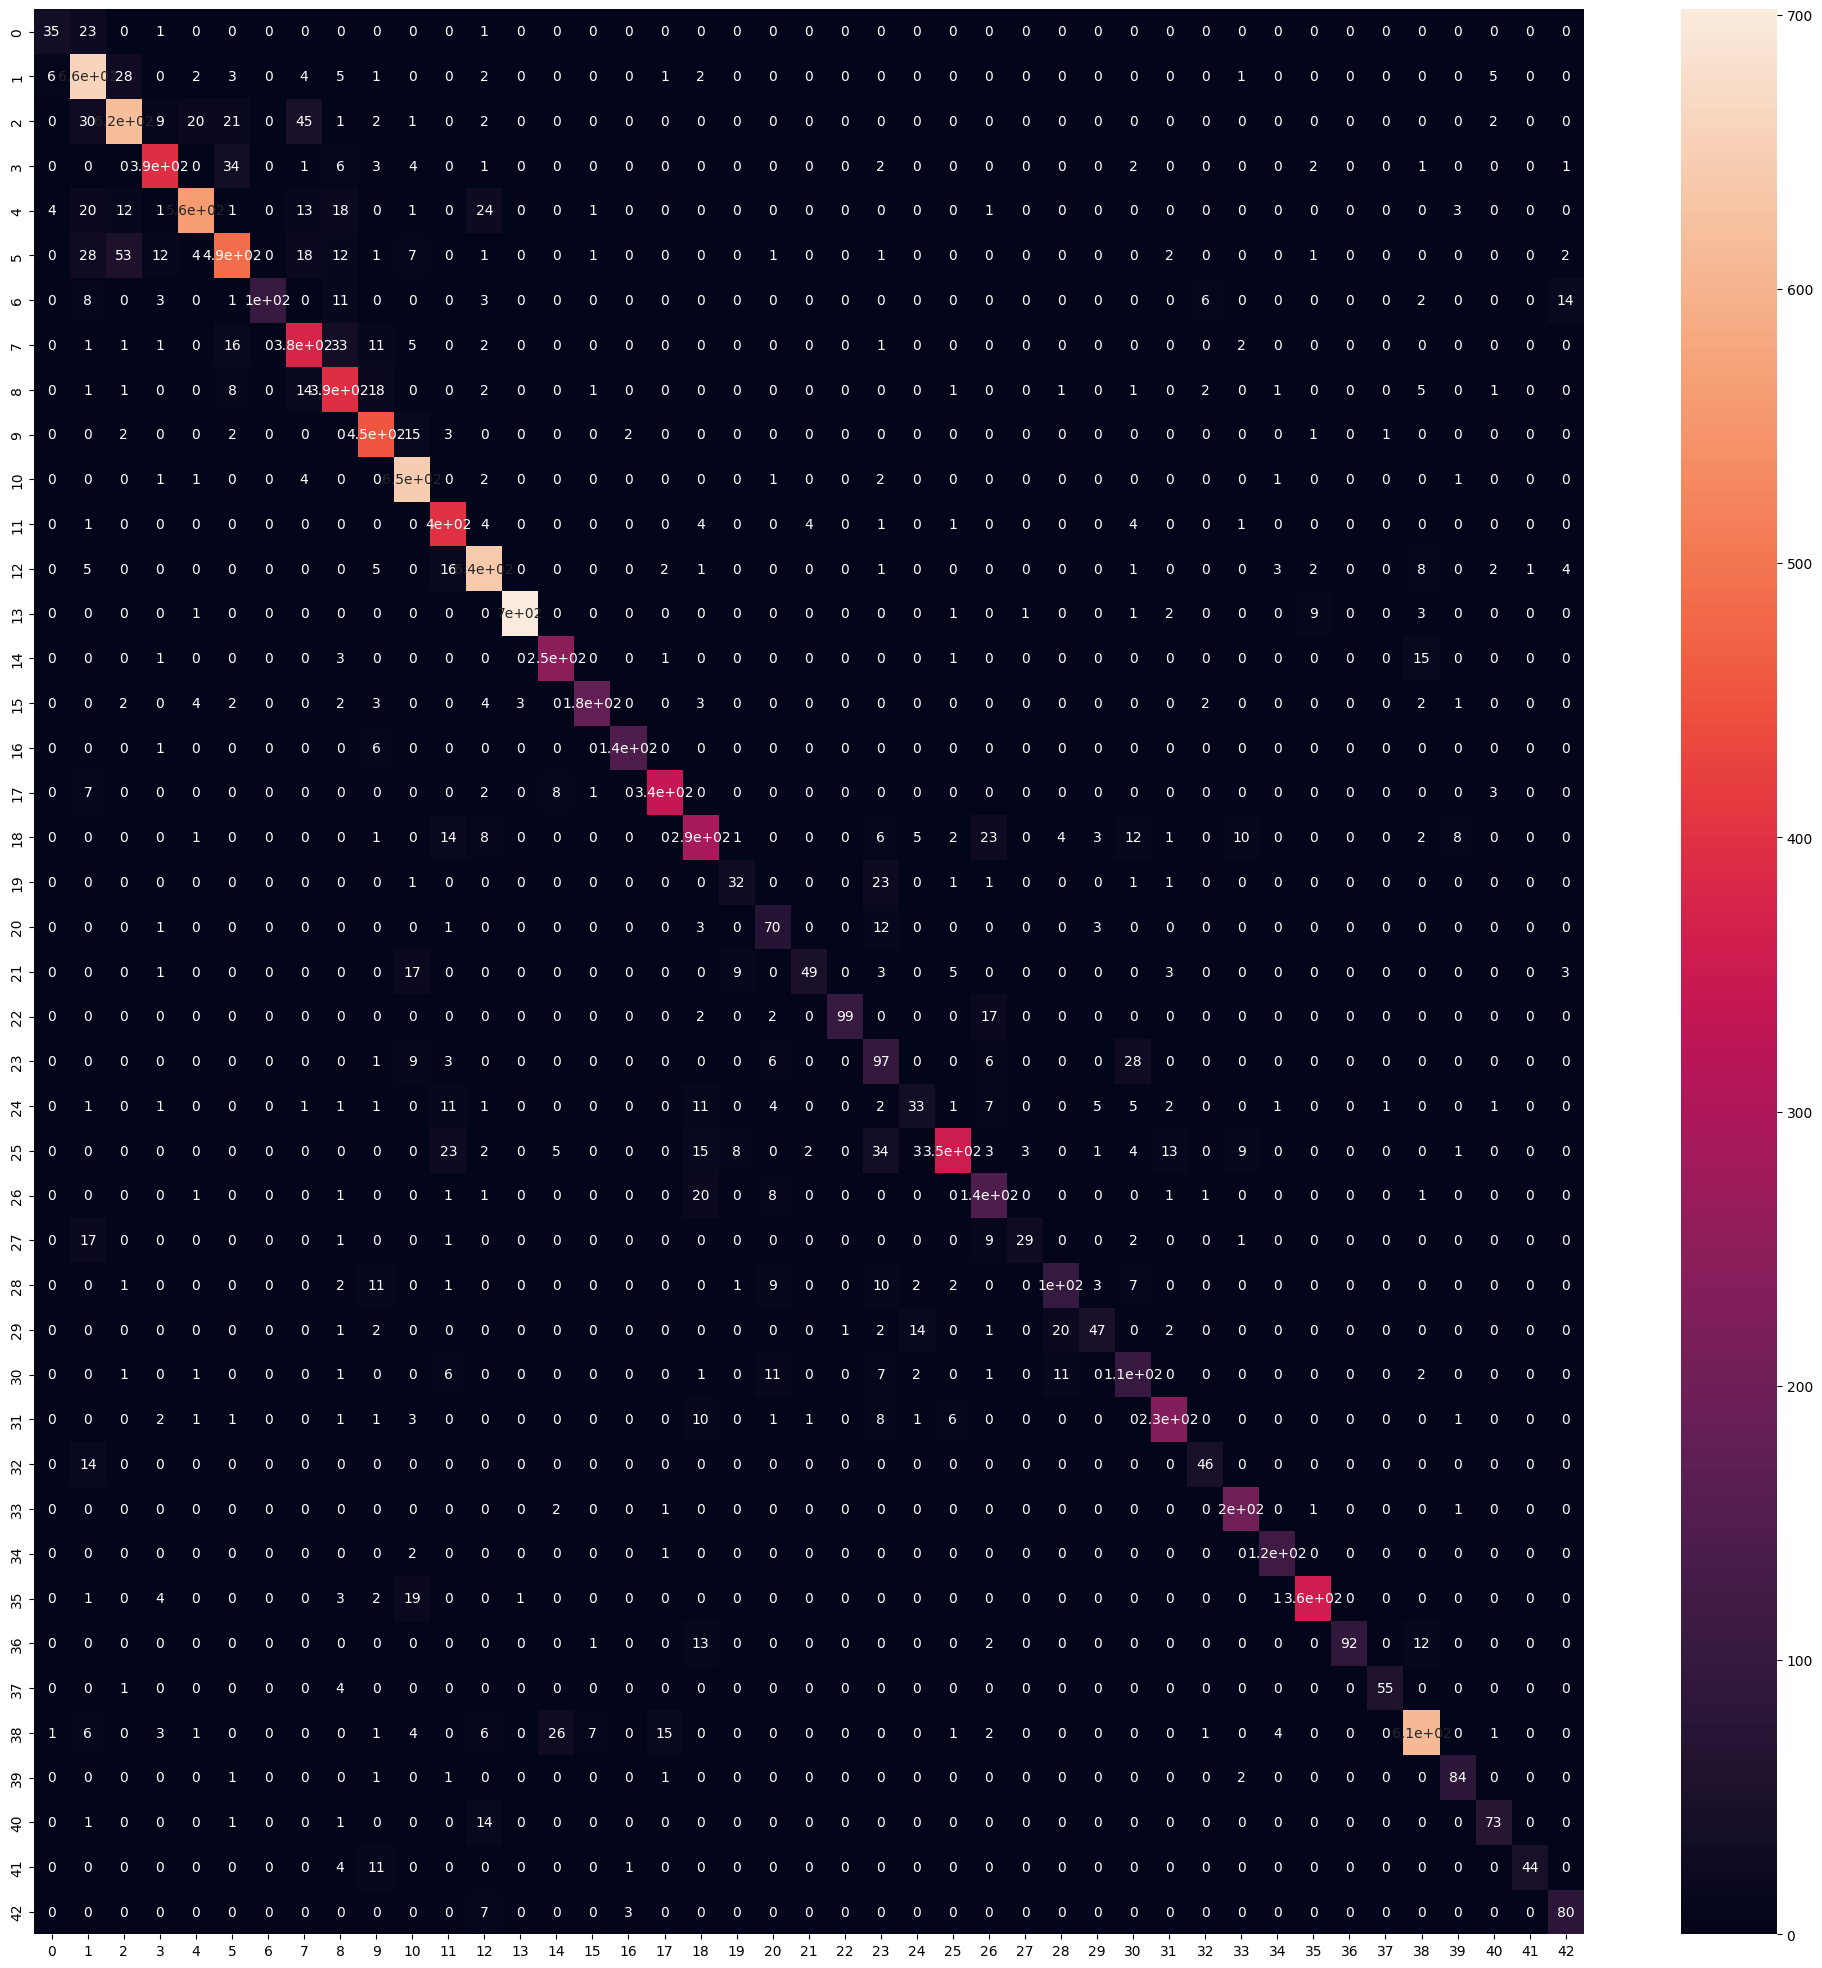

In [ ]:
predictions = CNN.predict(X_test_gray_norm)
predicted_classes = np.argmax(predictions, axis=1)
y_true = y_test

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25,25))
sns.heatmap(cm, annot = True)

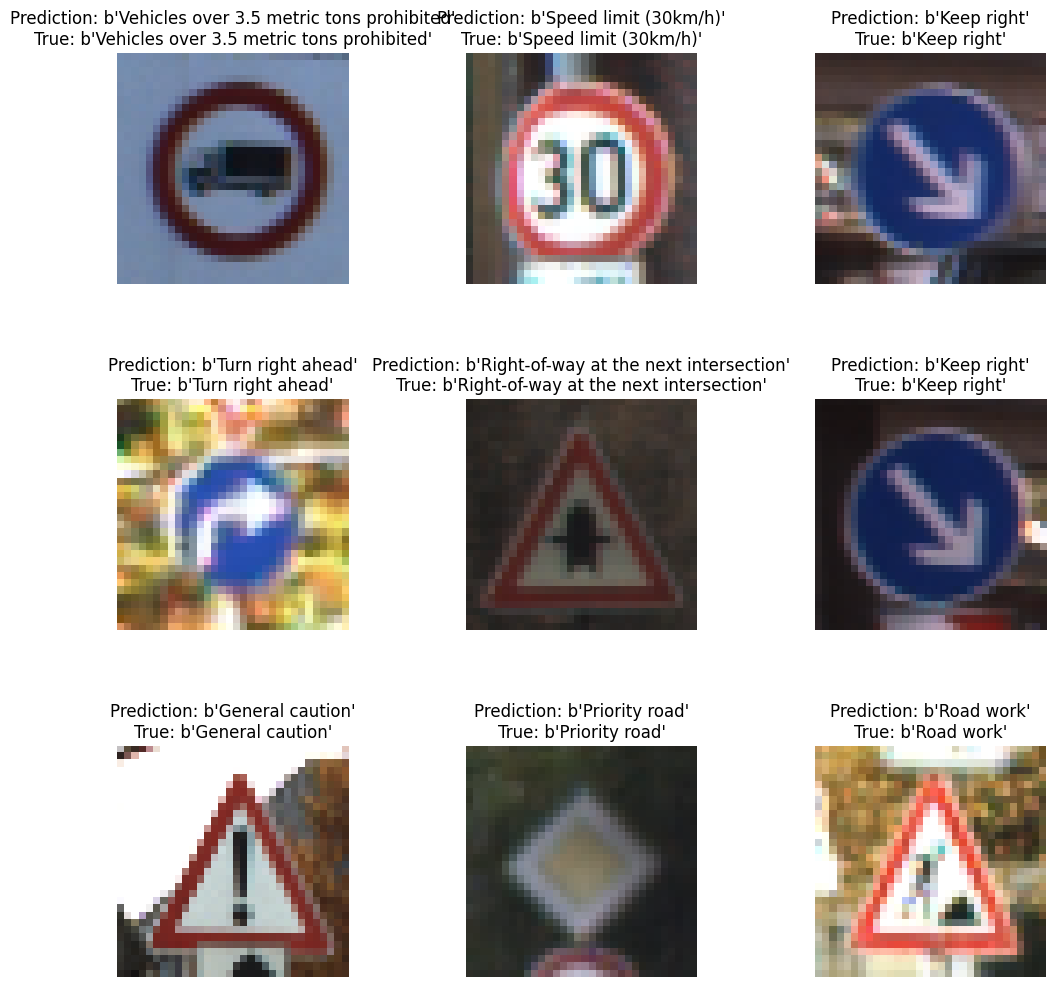

In [ ]:
class_info = {
    0: b'Speed limit (20km/h)',
    1: b'Speed limit (30km/h)',
    2: b'Speed limit (50km/h)',
    3: b'Speed limit (60km/h)',
    4: b'Speed limit (70km/h)',
    5: b'Speed limit (80km/h)',
    6: b'End of speed limit (80km/h)',
    7: b'Speed limit (100km/h)',
    8: b'Speed limit (120km/h)',
    9: b'No passing',
    10: b'No passing for vehicles over 3.5 metric tons',
    11: b'Right-of-way at the next intersection',
    12: b'Priority road',
    13: b'Yield',
    14: b'Stop',
    15: b'No vehicles',
    16: b'Vehicles over 3.5 metric tons prohibited',
    17: b'No entry',
    18: b'General caution',
    19: b'Dangerous curve to the left',
    20: b'Dangerous curve to the right',
    21: b'Double curve',
    22: b'Bumpy road',
    23: b'Slippery road',
    24: b'Road narrows on the right',
    25: b'Road work',
    26: b'Traffic signals',
    27: b'Pedestrians',
    28: b'Children crossing',
    29: b'Bicycles crossing',
    30: b'Beware of ice/snow',
    31: b'Wild animals crossing',
    32: b'End of all speed and passing limits',
    33: b'Turn right ahead',
    34: b'Turn left ahead',
    35: b'Ahead only',
    36: b'Go straight or right',
    37: b'Go straight or left',
    38: b'Keep right',
    39: b'Keep left',
    40: b'Roundabout mandatory',
    41: b'End of no passing',
    42: b'End of no passing by vehicles over 3.5 metric tons'
}

L = 3
W = 3

fig, axes = plt.subplots(L, W, figsize=(12, 12))
axes = axes.ravel()

for i in np.arange(0, L * W):
    axes[i].imshow(X_test[i])
    predicted_class = predicted_classes[i]
    true_class = y_true[i]

    predicted_label = class_info.get(predicted_class, f"Class {predicted_class}")
    true_label = class_info.get(true_class, f"Class {true_class}")
    axes[i].set_title(f'Prediction: {predicted_label}\nTrue: {true_label}')

    axes[i].axis('off')

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()



In [ ]:
CNN.save("./content/TSR.h5")

In [ ]:
from keras.models import load_model
model = load_model('./content/TSR.h5')

In [ ]:
# from tensorflow.keras.models import load_model
# CNN.save('/content/model_inception.keras')

In [ ]:
# with open('traffic_sign_model.pkl', 'wb') as model_file:
#     pickle.dump(CNN, model_file)

In [ ]:
# CNN.save("my_tensorflow_model.keras")

In [ ]:
# CNN.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# # Save the trained model to an HDF5 file
# CNN.save("/content/traffic_sign_classifier.h5")

# # Optionally, you can also download the file from Colab to your local machine
# from google.colab import files
# files.download("/content/traffic_sign_classifier.h5")


In [ ]:
# CNN.save('my_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# new_model = tf.keras.models.load_model('my_model.h5')
# new_model.save('my_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
